# Dataset Kelenjar Getah bening
Vania Vidya Vimala / 0706022010013

## Data Preparation
Dataset : https://raw.githubusercontent.com/vanyavidyavimala/Vania-Vidya-Vimala_ALP_0706022010013/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
# Import Dataset
url ='https://raw.githubusercontent.com/vanyavidyavimala/Vania-Vidya-Vimala_ALP_0706022010013/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv'
ds = pd.read_csv(url)
ds

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


## Exploratory Data Analysis

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


Periksa apakah ada baris yang duplikat

In [4]:
ds.duplicated().sum()

0

Periksa apakah ada missing values

In [5]:
ds.isna().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [6]:
ds['gender'] = ds['gender'].map({1 : 'male' , 2 : 'female'})
ds['Result_of_Treatment'] = ds['Result_of_Treatment'].map({0 : 'tidak ada kemajuan' , 1 : 'ada kemajuan'})
ds.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,male,15,11.00,6.0,1.0,30,25.0,tidak ada kemajuan
1,male,27,11.75,NaN,1.0,208,6.0,tidak ada kemajuan
2,male,32,12.00,9.0,1.0,43,50.0,tidak ada kemajuan
3,male,33,1.75,7.0,2.0,379,7.0,tidak ada kemajuan
4,male,34,5.00,7.0,3.0,64,7.0,tidak ada kemajuan


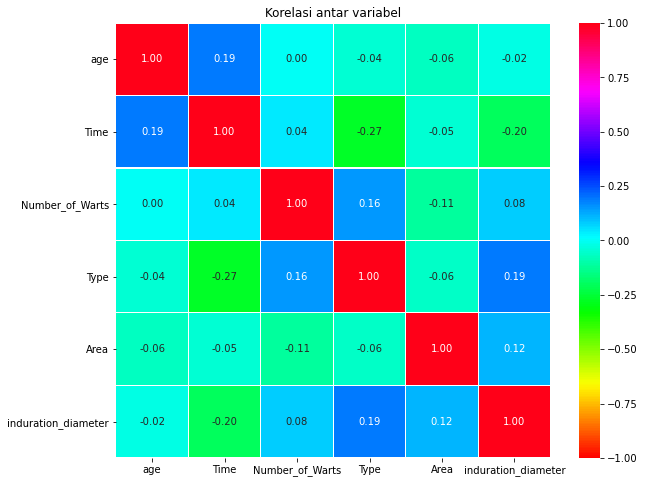

In [7]:
corr = ds.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "hsv", annot=True, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi antar variabel")
plt.show()

## Using Regression for inputting Missing Time Value

In [8]:
ds2 = ds.dropna(axis=0,subset=['Time','age'])
ds2 = ds2.loc[:, ['Time','age']]
missing_time = ds["Time"].isnull()
age_mistime = pd.DataFrame(ds['age'][missing_time])

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [9]:
X = ds2[['age']]
y = ds2['Time']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.2

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

Linear Reggresion pada Time 

In [11]:
from sklearn.linear_model import LinearRegression

y_train.shape
lm = LinearRegression()
lm.fit(X_train,y_train)
time_predict = lm.predict(age_mistime)
n = np.round(time_predict,2)

In [12]:
ds[ds['Time'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,male,38,NaN,8.0,2.0,56,45.0,ada kemajuan
50,male,54,NaN,13.0,3.0,43,5.0,ada kemajuan
72,female,28,NaN,4.0,1.0,9,2.0,ada kemajuan


In [13]:
misval1 = ds['Time'].isna()
ds.loc[misval1,'Time'] = n

In [14]:
ds.iloc[[43,50,72]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,male,38,7.44,8.0,2.0,56,45.0,ada kemajuan
50,male,54,8.47,13.0,3.0,43,5.0,ada kemajuan
72,female,28,6.80,4.0,1.0,9,2.0,ada kemajuan


Periksa apakah missing values dari time sudah tidak ada

In [15]:
ds.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

## Using Mode for inputting Number of Warts Value

In [16]:
ds[ds['Number_of_Warts'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,male,27,11.75,NaN,1.0,208,6.0,tidak ada kemajuan


Uji model dengan dataset test

In [17]:
ds['Number_of_Warts'] = ds['Number_of_Warts'].fillna(ds['Number_of_Warts'].mode()[0])
ds

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,male,15,11.00,6.0,1.0,30,25.0,tidak ada kemajuan
1,male,27,11.75,2.0,1.0,208,6.0,tidak ada kemajuan
2,male,32,12.00,9.0,1.0,43,50.0,tidak ada kemajuan
3,male,33,1.75,7.0,2.0,379,7.0,tidak ada kemajuan
4,male,34,5.00,7.0,3.0,64,7.0,tidak ada kemajuan
...,...,...,...,...,...,...,...,...
85,female,51,4.00,1.0,1.0,65,7.0,ada kemajuan
86,female,51,6.00,6.0,NaN,80,2.0,ada kemajuan
87,female,52,2.25,5.0,1.0,63,7.0,ada kemajuan
88,female,53,10.00,1.0,2.0,30,25.0,ada kemajuan


Periksa apakah missing values dari number_of_warts sudah tidak ada

In [18]:
ds.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

## Using Mean for inputting Induration Diameter Value


In [19]:
ds[ds['induration_diameter'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,male,15,4.0,4.0,3.0,25,NaN,ada kemajuan
53,female,15,6.5,19.0,1.0,56,NaN,ada kemajuan


In [20]:
ds['induration_diameter'] = ds['induration_diameter'].fillna(ds['induration_diameter'].mean())
ds

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,male,15,11.00,6.0,1.0,30,25.0,tidak ada kemajuan
1,male,27,11.75,2.0,1.0,208,6.0,tidak ada kemajuan
2,male,32,12.00,9.0,1.0,43,50.0,tidak ada kemajuan
3,male,33,1.75,7.0,2.0,379,7.0,tidak ada kemajuan
4,male,34,5.00,7.0,3.0,64,7.0,tidak ada kemajuan
...,...,...,...,...,...,...,...,...
85,female,51,4.00,1.0,1.0,65,7.0,ada kemajuan
86,female,51,6.00,6.0,NaN,80,2.0,ada kemajuan
87,female,52,2.25,5.0,1.0,63,7.0,ada kemajuan
88,female,53,10.00,1.0,2.0,30,25.0,ada kemajuan


In [21]:
ds.iloc[[19,53]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,male,15,4.0,4.0,3.0,25,14.5,ada kemajuan
53,female,15,6.5,19.0,1.0,56,14.5,ada kemajuan


Periksa apakah missing values dari induration_diameter sudah tidak ada

In [22]:
ds.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   5
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

## Using Regression for inputting Type Value

In [23]:
ds_nt = ds.dropna(axis=0,subset=['Type','induration_diameter'])
ds_nt = ds_nt.loc[:, ['Type','induration_diameter']]
no_type = ds["Type"].isnull()
i_type = pd.DataFrame(ds['induration_diameter'][no_type])

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [24]:
X = ds_nt[['induration_diameter']]
y = ds_nt['Type']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.2

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

Linear Reggresion pada Time

In [26]:
from sklearn.linear_model import LinearRegression

y_train.shape
lm = LinearRegression()
lm.fit(X_train,y_train)

time_pred = lm.predict(i_type)
n = np.round(time_pred,0)
n

array([2., 2., 2., 2., 2.])

In [27]:
ds[ds['Type'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,female,26,10.50,6.0,NaN,50,9.0,tidak ada kemajuan
26,male,20,8.00,6.0,NaN,45,8.0,ada kemajuan
66,female,23,6.75,6.0,NaN,19,2.0,ada kemajuan
86,female,51,6.00,6.0,NaN,80,2.0,ada kemajuan
89,female,53,7.25,6.0,NaN,81,7.0,ada kemajuan


In [28]:
misval2 = ds['Type'].isna()
ds.loc[misval2,'Type'] = n

In [29]:
ds.iloc[[10,26,66,86,89]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,female,26,10.50,6.0,2.0,50,9.0,tidak ada kemajuan
26,male,20,8.00,6.0,2.0,45,8.0,ada kemajuan
66,female,23,6.75,6.0,2.0,19,2.0,ada kemajuan
86,female,51,6.00,6.0,2.0,80,2.0,ada kemajuan
89,female,53,7.25,6.0,2.0,81,7.0,ada kemajuan


Periksa apakah missing values dari type sudah tidak ada

In [30]:
ds.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

Setelah periksa missing values secara keseluruhan, sudah terlihat bahwa hasilnya semua missing values sudah 0, yang berarti sudah tidak ada missing values.

## Result of Treatment

In [31]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='Count'>

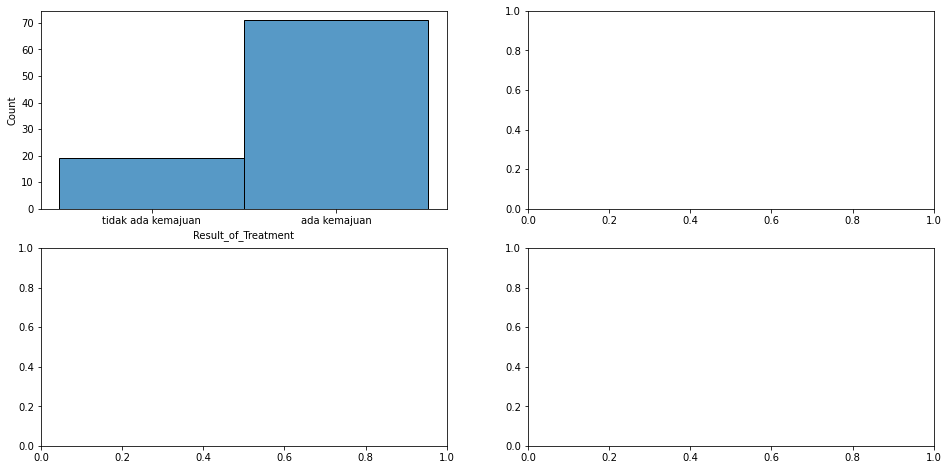

In [32]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
sns.histplot(data=ds,x='Result_of_Treatment',ax=axes[0,0])

### Kesimpulan

Dari tabel diatas Result of treatment kelenjar getah bening yang memberikan kemajuan ada 71 orang sedangkan yang tidak memberikan kemajuan ada 19 orang, jadi kesimpulan treatment kelenjar getah bening ini efektif memberikan dampak baik untuk kesembuhan penyakit getah bening.

## Logistic Regression

Lakukan fitur scaling pada variabel X_train dan X_test.

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Bangun model dan ukur accuracy nya

In [34]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

X_pred = classifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, X_pred))

Accuracy Score:  0.6470588235294118


Uji model dengan dataset test

In [35]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]


Ukur akurasi dari model persamaan Logistic Reggresion

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", confusion)
accurancy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accurancy)

Confusion Matrix
 [[10  0  1]
 [ 3  0  0]
 [ 2  0  1]]
Accuracy Score:  0.6470588235294118


## Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

Uji hasil model dengan data test

In [38]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", confusion)
accurancyc = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accurancyc)

Confusion Matrix
 [[10  0  1]
 [ 3  0  0]
 [ 2  0  1]]
Accuracy Score:  0.6470588235294118


## KNN

menggunakan metric pengukuran jarak 'euclidean'

In [40]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 2, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

Uji model dengan data test

In [41]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.]


Ukur akurasi dari model K-Nearest Neighbor

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", confusion)
accurancyb = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accurancyb)

Confusion Matrix
 [[9 2 0]
 [3 0 0]
 [3 0 0]]
Accuracy Score:  0.5294117647058824


Kesimpulan dari 3 Model diatas yaitu Logistic Reggresion, KNN, dan Naive Bayes adalah hasil ukur akurasi model KNN yang paling rendah yaitu 0.5294117647058824. Sedangkan hasil akurasi dari Logistic Reggresion dan Naive Bayes sama yaitu 0.6470588235294118.